In [2]:
# Libraries used in this Machine Learning Project are pandas,numpy,matplotlib,tensorflow,sklearn 

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_data = pd.read_csv(r'D:\Samarth\Stock Market Sales Prediction Using Stacked LSTM\NSE-TATAGLOBAL.csv')

In [6]:
df_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df_data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,21-09-2018,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,19-09-2018,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,18-09-2018,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,17-09-2018,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,14-09-2018,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [8]:
df_data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [9]:
df_data.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,03-08-2010,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,02-08-2010,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,30-07-2010,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,29-07-2010,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,28-07-2010,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [10]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
print(type(df_data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\vikas\AppData\Local\Temp\ipykernel_14928\2358447527.py:1: UserWarning: Parsing '28-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_data['Date'] = pd.to_datetime(df_data['Date'])
C:\Users\vikas\AppData\Local\Temp\ipykernel_14928\2358447527.py:1: UserWarning: Parsing '27-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_data['Date'] = pd.to_datetime(df_data['Date'])
C:\Users\vikas\AppData\Local\Temp\ipykernel_14928\2358447527.py:1: UserWarning: Parsing '26-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_data['Date'] = pd.to_datetime(df_data['Date'])
C:\Users\vikas\AppData\Local\Temp\ipykernel_14928\2358447527.py:1: UserWarning: Parsing '25-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_data['Date'] = pd.to_datetime(df_data['

In [11]:
df=df_data.sort_values(by='Date')

In [12]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


In [13]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
137,2018-12-03,270.00,276.65,269.70,276.00,276.05,2583575,7052.02
116,2018-12-04,273.90,277.80,271.65,273.90,273.85,2149205,5896.21
74,2018-12-06,262.75,268.40,262.75,267.20,267.60,1206633,3209.40
52,2018-12-07,270.40,272.45,264.35,264.50,265.20,2250217,6045.37
10,2018-12-09,216.35,223.70,212.65,221.65,222.65,4570939,10002.01


In [14]:
#resetting the index
df.reset_index(inplace=True)

In [15]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1,1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
2,1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
3,1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
4,2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


In [16]:
df.tail()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,137,2018-12-03,270.00,276.65,269.70,276.00,276.05,2583575,7052.02
2031,116,2018-12-04,273.90,277.80,271.65,273.90,273.85,2149205,5896.21
2032,74,2018-12-06,262.75,268.40,262.75,267.20,267.60,1206633,3209.40
2033,52,2018-12-07,270.40,272.45,264.35,264.50,265.20,2250217,6045.37
2034,10,2018-12-09,216.35,223.70,212.65,221.65,222.65,4570939,10002.01


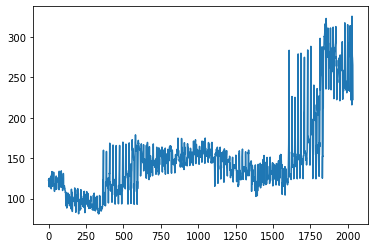

In [17]:
#plotting graph
plt.plot(df['Close'])

In [18]:
df_close = df['Close']

In [19]:
#Applying MinMaxScaler to scale the data to apply LSTM
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.76245915],
       [0.75265523],
       [0.57883987]])

In [20]:
train_size = int(len(df_close)*0.71)
test_size = len(df_close)-train_size
train_data,test_data = df_close[0:train_size,:],df_close[train_size:len(df_close),:1]

In [21]:
train_size,test_size

(1444, 591)

In [22]:
#converting array of values into dataset matrix with the help of user-defined function
def convert_arrtodataset(dataset,length):
    X,Y=[],[]
    for i in range(len(dataset)-length-1):
        val=dataset[i:(i+length),0]
        X.append(val)
        Y.append(dataset[i+length,0])
    return np.array(X),np.array(Y)    

In [23]:
X_train,Y_train=convert_arrtodataset(train_data,100)
X_test,Y_test=convert_arrtodataset(test_data,100)

In [24]:
X_train.shape

(1343, 100)

In [25]:
Y_train.shape

(1343,)

In [26]:
X_test.shape

(490, 100)

In [27]:
Y_test.shape

(490,)

In [28]:
#resahping input to perform LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [29]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [30]:
#Building LSTM model
LSTM_model=Sequential()
LSTM_model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
LSTM_model.add(LSTM(100,return_sequences=True))
LSTM_model.add(LSTM(100))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mean_squared_error',optimizer='adam')
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Fitting the LSTM model with the help of training dataset with their predictions in Y_train 
LSTM_model.fit(X_train,Y_train,validation_split=0.1,epochs=80,batch_size=64,verbose=1)

Epoch 1/80
19/19 [==============================] - 25s 605ms/step - loss: 0.0103 - val_loss: 0.0030
Epoch 2/80
19/19 [==============================] - 8s 435ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 3/80
19/19 [==============================] - 9s 449ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 4/80
19/19 [==============================] - 9s 469ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 5/80
19/19 [==============================] - 9s 476ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 6/80
19/19 [==============================] - 9s 482ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 7/80
19/19 [==============================] - 9s 480ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 8/80
19/19 [==============================] - 9s 480ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/80
19/19 [==============================] - 9s 459ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 10/80
19/19 [==============================] - 9s 471ms/step - loss: 0.0025 - val_loss: 0.002

In [32]:
#Testing the model trained above with train dataset with X_test
Y_predict = LSTM_model.predict(X_test)

16/16 [==============================] - 2s 53ms/step


In [33]:
Y_predict

array([[0.19670452],
       [0.23455507],
       [0.2735165 ],
       [0.2195332 ],
       [0.24470702],
       [0.26802042],
       [0.26689598],
       [0.27057013],
       [0.28037617],
       [0.28127033],
       [0.2840608 ],
       [0.2895718 ],
       [0.28285855],
       [0.27044627],
       [0.25007272],
       [0.24723159],
       [0.24585032],
       [0.25033048],
       [0.17488155],
       [0.16865426],
       [0.18824384],
       [0.19725272],
       [0.23669626],
       [0.2550399 ],
       [0.20843238],
       [0.18737923],
       [0.19418791],
       [0.19407213],
       [0.19660991],
       [0.18697327],
       [0.18441871],
       [0.18266575],
       [0.17515177],
       [0.17638484],
       [0.18039194],
       [0.18224496],
       [0.18467689],
       [0.21261676],
       [0.161888  ],
       [0.15947857],
       [0.16665816],
       [0.1967827 ],
       [0.21692203],
       [0.2168102 ],
       [0.19095255],
       [0.17948137],
       [0.17703804],
       [0.181

In [34]:
Y_predict1 = scaler.inverse_transform(Y_predict)

In [35]:
Y_predict1

array([[129.10326 ],
       [138.36908 ],
       [147.90683 ],
       [134.69173 ],
       [140.85428 ],
       [146.56139 ],
       [146.28613 ],
       [147.18556 ],
       [149.58607 ],
       [149.80498 ],
       [150.48808 ],
       [151.83717 ],
       [150.19377 ],
       [147.15524 ],
       [142.1678  ],
       [141.47229 ],
       [141.13416 ],
       [142.2309  ],
       [123.760994],
       [122.236565],
       [127.03208 ],
       [129.23746 ],
       [138.89323 ],
       [143.38376 ],
       [131.97424 ],
       [126.820435],
       [128.4872  ],
       [128.45886 ],
       [129.08011 ],
       [126.721054],
       [126.095695],
       [125.66658 ],
       [123.827156],
       [124.129   ],
       [125.10994 ],
       [125.56357 ],
       [126.158905],
       [132.99858 ],
       [120.580185],
       [119.99036 ],
       [121.74792 ],
       [129.1224  ],
       [134.05252 ],
       [134.02513 ],
       [127.69518 ],
       [124.88705 ],
       [124.2889  ],
       [125.4

In [36]:
import math
from sklearn.metrics import mean_squared_error

In [37]:
#Checking the prediction by taking mean_squared_error of Y_test and Y_predict1
math.sqrt(mean_squared_error(Y_test,Y_predict1))

202.4673100277402